In [1]:
from PIL import Image
import os
from glob import glob
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import albumentations as A

In [2]:
base = '/opt/ml/segmentation/input/mmseg'
train_images = glob(os.path.join(base, 'images', 'training', '*'))
train_annots = glob(os.path.join(base, 'annotations', 'training', '*'))

train_images.sort()
train_annots.sort()
i = 0

(512, 512, 3)


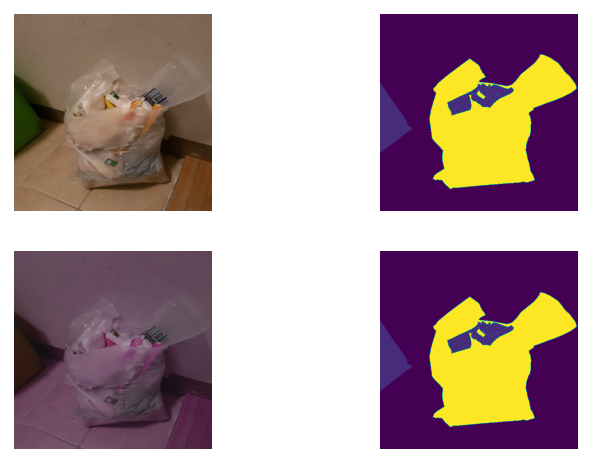

In [3]:
# i += 1
img = np.array(Image.open(train_images[i]))
ann = np.array(Image.open(train_annots[i]))
trans = A.Compose([
    # A.VerticalFlip(p=1.0),
    # A.CoarseDropout(max_height=8, max_width=8,p=1.0),
    # A.CoarseDropout(max_height=100, max_width=100,p=1.0),
    # A.ElasticTransform(p=1.0, border_mode=0),
    # A.OpticalDistortion(distort_limit=0.6,p=1.0),
    # A.PiecewiseAffine(p=1.0),
    # A.GridDistortion(p=1.0,border_mode=0, mask_value=0, distort_limit=0.7),
    # A.GridDistortion(p=1.0, border_mode=3),
    # A.RandomCrop(height=300, width=300,p=1)
    A.ColorJitter(p=1.0)
])
res = trans(image=img, mask=ann)

A_img, A_mask = res['image'], res['mask']

row = 2
col = 2
fig = plt.figure()
ax1 = fig.add_subplot(row,col,1)
ax2 = fig.add_subplot(row,col,2)
ax3 = fig.add_subplot(row,col,3)
ax4 = fig.add_subplot(row,col,4)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax1.imshow(img)
ax2.imshow(ann)
print(A_img.shape)
ax3.imshow(A_img)
ax4.imshow(A_mask)


In [4]:
base_single = '/opt/ml/segmentation/input/mmseg_general_distill'
train_images = glob(os.path.join(base_single, 'images', 'training', '*'))
train_annots = glob(os.path.join(base_single, 'annotations', 'training', '*'))
origin_annots = glob(os.path.join(base, 'annotations', 'training', '*'))

train_images.sort()
train_annots.sort()
origin_annots.sort()
i = 0

In [5]:
i += 1
img = np.array(Image.open(train_images[i]))
ann = np.array(Image.open(train_annots[i]))
origin_ann = np.array(Image.open(origin_annots[i]))

row = 1
col = 3
fig = plt.figure()
ax1 = fig.add_subplot(row,col,1)
ax2 = fig.add_subplot(row,col,2)
ax3 = fig.add_subplot(row,col,3)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.imshow(img)
ax2.imshow(ann)
ax2.set_title('single mask')
ax3.imshow(origin_ann)
ax3.set_title('origin mask')

IndexError: list index out of range

In [6]:
origin = sorted(glob('/opt/ml/segmentation/input/data/masks/origin/*'))
modeRe = sorted(glob('/opt/ml/segmentation/input/data/masks/mode_resampled/*'))
condRe = sorted(glob('/opt/ml/segmentation/input/data/masks/mode_resampled_conditional/*'))
i=0

/opt/ml/segmentation/input/data/masks/origin/batch_01_vt+0201.png


Text(0.5, 1.0, 'conditional resam')

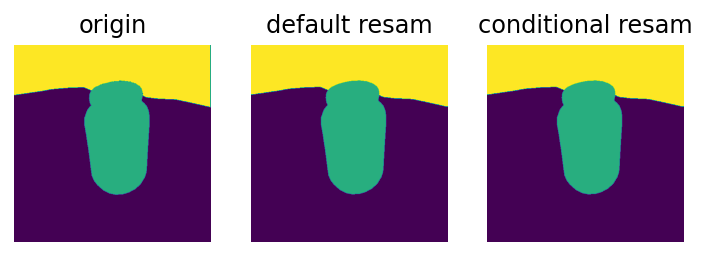

In [177]:
i += 1
print(origin[i])
img = np.array(Image.open(origin[i]))
ann = np.array(Image.open(modeRe[i]))
con = np.array(Image.open(condRe[i]))

row = 1
col = 3
fig = plt.figure()
ax1 = fig.add_subplot(row,col,1)
ax2 = fig.add_subplot(row,col,2)
ax3 = fig.add_subplot(row,col,3)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.imshow(img)
ax1.set_title('origin')
ax2.imshow(ann)
ax2.set_title('default resam')
ax3.imshow(con)
ax3.set_title('conditional resam')